本章分为如下内容：

* Rosenblatt感知器简介
* 感知器收敛算法
* 感知器实现
* Rosenblatt感知器尝试解决线性不可分问题

# 2.1 Rosenblatt感知器简介
在神经网络的形成阶段（1943-1958），一些研究者做出了开拓性的贡献：

* McCulloch and Pitts（1943）引入神经网络的概念，并设计了M-P模型。
* Hebb（1949）提出自组织学习的第一个规则。
* Rosenblatt（1958）提出感知器作为神经网络中监督学习的第一个模型。

感知器是用于线性可分模式（即类别分别位于超平面分割的两边）分类的最简单的神经网络模型。它在M-P模型的基础上添加了训练方法，并且Rosenblatt证明了当用来训练感知器的模式（向量）取自两个线性可分的类时，感知器算法是收敛的。算法的收敛性证明被称为感知器收敛定理。

最简单的感知器由一个M-P神经元构成，只能完成两类的模式分类，通过扩展感知器的输出层，相应的可以完成多于两类的分类。但是，只有这些类是线性可分时感知器才能正常工作。Rosenblatt感知器是建立在一个非线性的M-P神经元上。

<img src='./images/M-P.png' width='700px' />

但需要注意的是，Rosenblatt感知器的激活函数形式与M-P模型有所不同。在M-P模型中激活函数输出 “0”，表示抑制，在Rosenblatt感知器中激活函数输出 “-1”，表示神经元抑制。即激活函数形式为：

$$\begin{equation}\mathrm{sgn}(x)=\begin{cases}1, & x \geq 0\\ -1, & x < 0 \end{cases}\end{equation}$$



上述模型中 $x_1, x_2,...,x_n$ 表示外部刺激，也可记为$\mathbf x$，也就是模型输入，$w_1, w_2,..., w_n$ 为突触权值，也就是模型自由参数，也可记为$\mathbf w$，$b$ 表示阈值。为了简化表示，令 $x_0 = 1, w_0=-b$，则模型输入可表示为 $\mathbf{w}^\mathrm{T}\mathbf{x}$。即Rosenblatt感知器表示为$\mathrm{sgn}(\mathbf{w}^\mathrm{T}\mathbf{x})$。

注意：当我们把感知器中的参数$b$看做是阈值时，往往使用$y=f\left(\sum_{i=1}^nw_ix_i-b\right)$表示模型，注意这时候$b$前面使用的是负号；当我们把$b$看作是偏置值时，往往使用$y=f\left(\sum_{i=0}^nw_ix_i\right)$表示模型，其中$x_0=1$，二者是等价的。

当$\mathbf{w}^\mathrm{T}\mathbf{x}\geq 0$，则模型输出 “1”，表示输出某一类，此处表示正类，否则输出 “-1”，表示负类。即$\mathbf{w}^\mathrm{T}\mathbf{x}= 0$表示决策边界。例如在二维两类模式分类问题中，决策边界为$w_0+w_1x_1+w_2x_2=0$，即为二维平面坐标系中的一条直线，如下图所示。

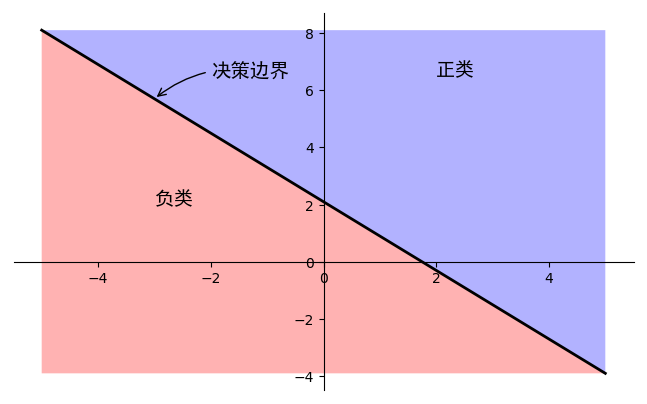

In [39]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 5), dpi=100)

X = np.linspace(-5, 5, 256)
Y = X * (-1.2) + 2.1
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

plt.plot(X, Y, color='black', linewidth=2)
plt.fill_between(X, Y.min(), Y, facecolor='red', alpha='0.3')
plt.fill_between(X, Y, Y.max(), facecolor='blue', alpha='0.3')
plt.annotate(
    '决策边界', xy=(-3, 3 * 1.2 + 2.1), xytext=(-2., +6.5), 
     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), 
     fontproperties='SimHei', fontsize=14)

plt.text(2, 6.5, '正类', family = "SimHei", size=14)
plt.text(-3, 2, '负类', family = "SimHei", size=14)

plt.show()

# 2.2 感知器收敛算法

对于线性可分模式，设置合理的感知器参数一定能使得感知器正确分类数据，感知器参数的设置被称为感知器收敛算法，算法流程如下：

---
变量和参数：

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{x}(n)=m+1$维输入向量，即：$\mathbf{x}(n)=[+1, x_1(n), x_2(n),...,, x_m(n)]^{\mathrm{T}}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{w}(n)=m+1$维权重向量，即：$\mathbf{w}(n)=[b, w_1(n), w_2(n),...,, w_m(n)]^{\mathrm{T}}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;其中$b=$偏置值

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y(n)=$实际响应（ 1 或 -1 的模型输出的值）

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$d(n)=$期望响应（ 1 或 -1 的标记值）

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\eta=$学习率（介于0 - 1 之间）

1. 初始化。设$\mathbf{w}(0)=\mathbf{0}$，对时间步$n=1, 2,...$执行下列计算。

2. 计算模型输出。对时间步$n$，输入$\mathbf{x}(n)$，得到模型输出：$y(n)=\mathrm{sgn}(\mathbf{w}^\mathrm{T}(n)\mathbf{x}(n))$

3. 更新权值向量。$\mathbf{w}(n+1)=\mathbf{w}(n)+\eta[d(n)-y(n)]\mathbf{x}(n)$。这里：

$$\begin{equation}\mathrm{d}(n)=\begin{cases}1, & 若\mathbf{x}(n)属于正类\\ -1, &若\mathbf{x}(n)属于负类 \end{cases}\end{equation}$$

4. 继续。时间步$n$增加 1 ，返回第二步。

---

感知器收敛算法的更新权值规则中，$d(n)-y(n)$用于衡量误差，学习率$\eta$起到调节权值更新速率的作用，学习率较大，参数更新速度快，但可能影响收敛，学习率较小，收敛平稳，但速度较慢。

# 2.3 Rosenblatt感知器实现

实现Rosenblatt感知器与收敛算法，并使用均方误差（MSE）衡量模型性能。这里使用线性可分的双月数据集进行训练与测试。

双月数据集是一个非对称面对面的“月亮”区域组成的数据集。落在上半月的数据集为一个类别，落在下半月的数据集是另一个类别，每个半月拥有相同的半径$r$、厚度$w$，两个月亮之间的垂直距离为$d$，其中$d>0$表示两个月亮是分离的，即线性可分的，否则则为线性不可分的。
<img src='./images/dbmoon.png' width='500px' />

这里我们使用如下算法生成双月数据集：

In [26]:
def dbmoon(N=100, d=2, r=10, w=2):
    '''生成双月数据集
    
    Args:
        N: 数据集数量
        d: 双月之间的距离
        r: 双月半径
        w: 每个月亮的厚度
        
    Returns:
        返回一个`shape=[N * 2, 2]`的数组，前100个元素表示
        上半月，后100个元素表示下半月。
    '''
    w2 = w / 2
    data = np.empty(0)
    while data.shape[0] < N:
        #generate Rectangular data
        tmp_x = 2 * (r + w2) * (np.random.random([N, 1]) - 0.5)
        tmp_y = (r + w2) * np.random.random([N, 1])
        tmp = np.concatenate((tmp_x, tmp_y), axis=1)
        tmp_ds = np.sqrt(tmp_x * tmp_x + tmp_y * tmp_y)
        #generate double moon data ---upper
        idx = np.logical_and(tmp_ds > (r - w2), tmp_ds < (r + w2))
        idx = (idx.nonzero())[0]

        if data.shape[0] == 0:
            data = tmp.take(idx, axis=0)
        else:
            data = np.concatenate((data, tmp.take(idx, axis=0)), axis=0)
    
    db_moon = data[0: N, :]
    #generate double moon data ----down
    data_t = np.empty([N, 2])
    data_t[:, 0] = data[0: N, 0] + r
    data_t[:, 1] = -data[0: N, 1] - d
    db_moon = np.concatenate((db_moon, data_t), axis=0)
    return db_moon

生成2500个数据样本，并对数据样本进行可视化。

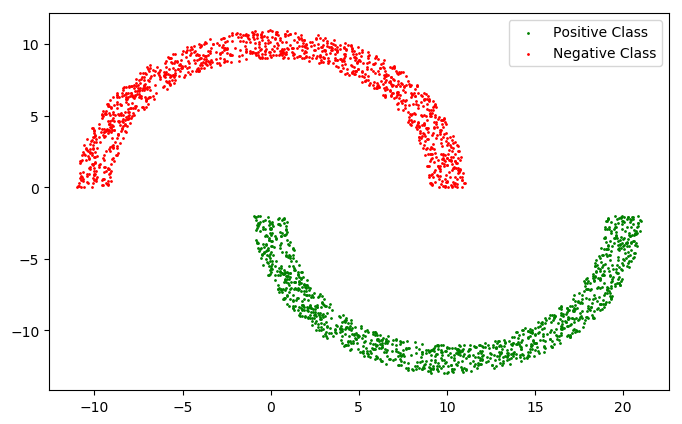

In [27]:
# 生成数据集
num_example = 2500
x =  dbmoon(N=num_example // 2)
y = np.concatenate([np.ones([num_example // 2]), -np.ones([num_example // 2])])

plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Positive Class')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Negative Class')
plt.legend(loc='best')
plt.show()

我们将数据集打乱，并分成2000个训练集以及500个测试集。

In [28]:
from sklearn.model_selection import train_test_split

# 将数据集打乱并分为训练集与测试集
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=500)

到此数据集准备完成，接下来需要生成模型、代价函数以及训练部分的代码。分析数据集可以发现，每个数据点拥有2个属性，那么权重向量（不包括偏置值）的长度为2，所有首先我们可以确定模型的形式，如下：

In [29]:
w = np.zeros([2], dtype=np.float32)
b = 0.

def rosenblatt(x):
    z = np.sum(w * x) + b
    if z >= 0:
        return 1
    else:
        return -1

模型的代价函数为均方误差代价函数，$MSE=\frac{1}{N}\sum_{i=1}^{N}(label_i-predicted_i)^2$，实现如下：

In [30]:
def mse(label, pred):
    return np.average((np.array(label) - np.array(pred)) ** 2)

当然，也可使用sklearn中的评价指标，即`sklearn.metrics`模块下的`mean_squared_error`实现代价函数。

接下来，我们就可以根据感知器收敛算法训练模型。为了能够清晰的了解训练过程，我们在每次训练之后使用测试集评估模型，并记录下来。最后将最终的决策边界绘制在图中。

In [31]:
# 训练模型 10000 次
train_steps = 10000
# 摘要频率
summary_step = 50
# 摘要，记录训练中的代价变化
summary = np.empty([train_steps // summary_step, 2])
# 学习率
lr = 0.1

for i in range(0, train_steps):
    # 评估模型
    if i % summary_step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j]))
        loss = mse(test_y, test_out)
        idx = int(i / summary_step)
        summary[idx] = np.array([i, loss])
    
    # 取一个训练集中的样本
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]
    # 得到模型输出结果
    out = rosenblatt(one_x)
    # 更新权值
    w = w + lr * (one_y - out) * one_x
    b = b + lr * (one_y - out)

训练完成之后，我们将训练结果进行可视化。

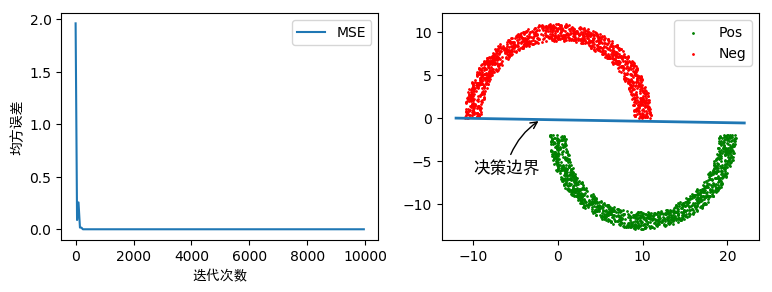

In [32]:
plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1, 2, 1)
plt.plot(summary[:, 0], summary[:, 1], label='MSE')
plt.legend(loc='best')
plt.xlabel('迭代次数', fontproperties='SimHei')
plt.ylabel('均方误差', fontproperties='SimHei')

plt.subplot(1, 2, 2)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Pos')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Neg')
plt.legend(loc='best')
left_coord_y = (-b - (-12) * w[0]) / w[1]
right_coord_y = (-b - (22) * w[0]) / w[1]
plt.plot([-12, 22], [left_coord_y, right_coord_y], linewidth=2)

plt.annotate(
    '决策边界', xy=(-2, -0.2), xytext=(-10., -6.5), 
     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), 
     fontproperties='SimHei', fontsize=12)

plt.show()

当两个半月之间的垂直距离变为负数时，感知器无法收敛，其在训练的过程中代价不断波动。

# 2.4 对于线性不可分数据
在线性不可分数据集中，Rosenblatt感知器也并非完全无法使用，这时候可以对输入模型的特征做一系列非线性的变换进而得到新的特征，这些特征在Rosenblatt感知器可能是线性可分的。

例如，对于如下数据集，直接使用Rosenblatt感知器无法分类。

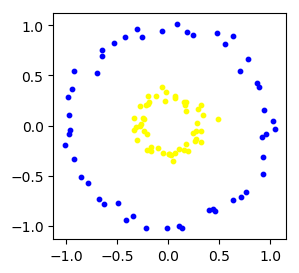

In [33]:
from sklearn.datasets import make_circles

plt.figure(figsize=(3, 3), dpi=100)
circles_data = make_circles(shuffle=False, noise=0.05, factor=0.3)
circles_data[1][:50] = -1
plt.scatter(circles_data[0][:50,0], circles_data[0][:50,1], 10, color='blue')
plt.scatter(circles_data[0][50:,0], circles_data[0][50:,1], 10, color='yellow')

这时候可以使用数据集的属性的非线性变换对数据进行变换，使得可以使用感知器进行分类。这里我们可以使用每个属性的平方来进行，如下：

In [34]:
# 将数据集打乱并分为训练集与测试集
train_x, test_x, train_y, test_y = train_test_split(circles_data[0], circles_data[1], test_size=20)

# 训练模型 1000 次
train_steps = 100
# 摘要频率
summary_step = 1
# 摘要，记录训练中的代价变化
summary = np.empty([train_steps // summary_step, 2])
# 学习率
lr = 0.01

w = np.zeros([2], dtype=np.float32)
b = 0.

def rosenblatt(x):
    z = np.sum(w * x) + b
    if z >= 0:
        return 1
    else:
        return -1

for i in range(0, train_steps):
    # 评估模型
    if i % summary_step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j] ** 2))
        loss = mse(test_y, test_out)
        idx = int(i / summary_step)
        summary[idx] = np.array([i, loss])
    
    # 取一个训练集中的样本
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]
    # 得到模型输出结果
    out = rosenblatt(one_x ** 2)
    # 更新权值
    w = w + lr * (one_y - out) * (one_x ** 2)
    b = b + lr * (one_y - out) 

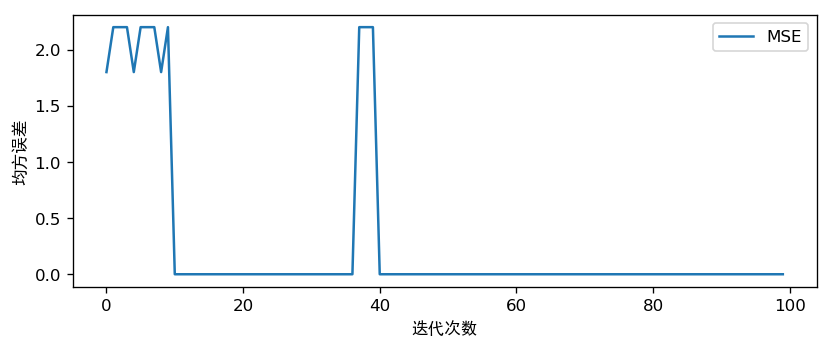

In [35]:
plt.figure(figsize=(8, 3), dpi=120)

plt.plot(summary[:, 0], summary[:, 1], label='MSE')
plt.legend(loc='best')
plt.xlabel('迭代次数', fontproperties='SimHei')
plt.ylabel('均方误差', fontproperties='SimHei')

plt.show()

使用属性组合只有在少数情况下是适用，在属性较多时，属性的不同组合将来指数级的新属性，使得模型变得很复杂。

# 练习

1. 代码练习

    * 尝试生成垂直距离小于零的双月数据集，然后使用此数据集训练Rosenblatt感知器模型，记录其代价变化，并可视化。

    * 思考：根据上述训练结果以及决策边界的可视化结果，说明训练Rosenblatt感知器去解决线性不可分问题是否意味着模型完全失效？如果不是，思考在训练时如何确定训练终止条件。

    * 训练感知器模型时，使用到了学习率这个超参数，实际中，学习率是较难确定的超参数之一，为此提出了学习率衰减，请自行学习学习率衰减的原理与实现方法，并实现线性衰减学习率模型应用与Rosenblatt感知器模型的训练中。

    * 在训练模型时，模型训练何时终止并无说明，但由于Rosenblatt感知器模型在线性可分的数据集中一定可以收敛，所以代价会逐步趋于零或等于零，此时即可终止训练，尝试使用代码实现动态终止训练。
    
2. 判断题

    * [ ] Rosenblatt感知器只能训练其进行二类别的判别。
    * [x] 对于线性可分的数据集，Rosenblatt感知器一定能够收敛。
    * [x] Rosenblatt（1958）提出感知器作为神经网络中监督学习的第一个模型。
    * [ ] 一般的在二分类任务中，Rosenblatt感知器的激活函数输出 0 表示负类，输出 1 表示正类。
    * [x] 均方误差代价函数可用于衡量模型在分类任务中的性能。

# 深度学习Rosenblatt感知器练习作业

##   1. 尝试生成垂直距离小于零的双月数据集，然后使用此数据集训练Rosenblatt感知器模型，记录其代价变化，并可视化。




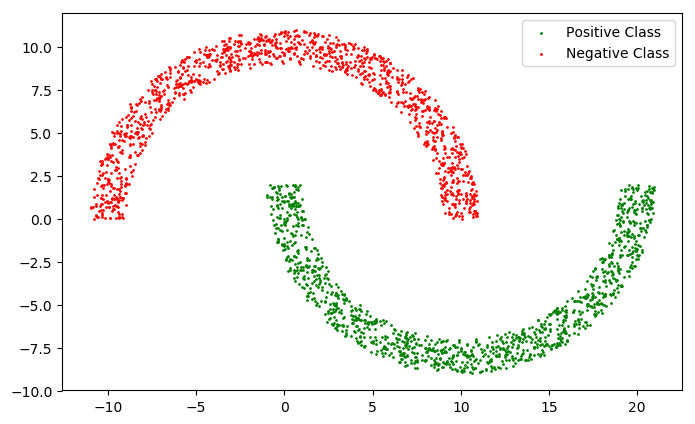

In [36]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# 生成垂直距离小于零的双月数据集并可视化
num_example = 2500
x =  dbmoon(N=num_example // 2, d = -2)
y = np.concatenate([np.ones([num_example // 2]), -np.ones([num_example // 2])])

plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Positive Class')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Negative Class')
plt.legend(loc='best')
plt.show()

from sklearn.model_selection import train_test_split

# 将数据集打乱并分为训练集与测试集
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=500)

w = np.zeros([2], dtype=np.float32)
b = 0.

def rosenblatt(x):
    z = np.sum(w * x) + b
    if z >= 0:
        return 1
    else:
        return -1
    
def mse(label, pred):
    return np.average((np.array(label) - np.array(pred)) ** 2)

In [37]:
# 训练模型 10000 次
train_steps = 10000
# 摘要频率
summary_step = 50
# 摘要，记录训练中的代价变化
summary = np.empty([train_steps // summary_step, 2])
# 学习率
lr = 0.1

for i in range(0, train_steps):
    # 评估模型
    if i % summary_step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j]))
        loss = mse(test_y, test_out)
        idx = int(i / summary_step)
        summary[idx] = np.array([i, loss])
    
    # 取一个训练集中的样本
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]
    # 得到模型输出结果
    out = rosenblatt(one_x)
    # 更新权值
    w = w + lr * (one_y - out) * one_x
    b = b + lr * (one_y - out)

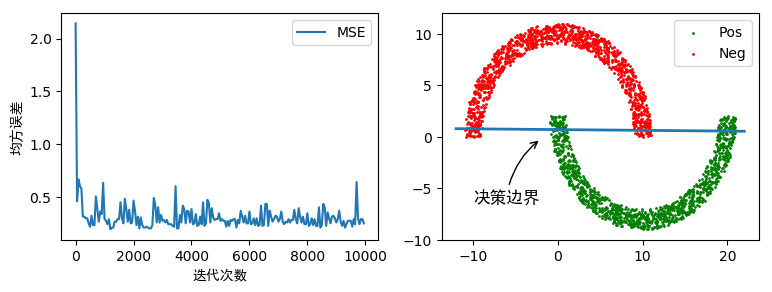

In [38]:
# 训练完成之后，我们将训练结果进行可视化。
plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1, 2, 1)
plt.plot(summary[:, 0], summary[:, 1], label='MSE')
plt.legend(loc='best')
plt.xlabel('迭代次数', fontproperties='SimHei')
plt.ylabel('均方误差', fontproperties='SimHei')

plt.subplot(1, 2, 2)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Pos')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Neg')
plt.legend(loc='best')
left_coord_y = (-b - (-12) * w[0]) / w[1]
right_coord_y = (-b - (22) * w[0]) / w[1]
plt.plot([-12, 22], [left_coord_y, right_coord_y], linewidth=2)

plt.annotate(
    '决策边界', xy=(-2, -0.2), xytext=(-10., -6.5), 
     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), 
     fontproperties='SimHei', fontsize=12)

plt.show()

## 2. 思考：根据上述训练结果以及决策边界的可视化结果，说明训练Rosenblatt感知器去解决线性不可分问题是否意味着模型完全失效？如果不是，思考在训练时如何确定训练终止条件。

   **答：观察上述训练结果以及决策边界的可视化结果，可以看出训练Rosenblatt感知器去解决线性不可分问题时并不意味着模型完全失效，只不过无法完全收敛。对于线性不可分数据集训练时的终止条件的确定，可以统计相邻两次训练的MSE变化的范围，当变化范围每次都基本不变时。比如设$\epsilon = 0.005$，当$\left|MSE_t - MSE_{t+1}\right|<=\epsilon$时，可以认为训练完成。**

## 3. 训练感知器模型时，使用到了学习率这个超参数，实际中，学习率是较难确定的超参数之一，为此提出了学习率衰减，请自行学习学习率衰减的原理与实现方法，并实现线性衰减学习率模型应用于Rosenblatt感知器模型的训练中。


### 学习率衰减的原理及其实现

学习率其实就是算法的步长，一步走多少决定了很多事情：步子大了，优化效率高，很可能一下越过最优解；相反，步子小了，优化效率低，很可能陷进一个局部最优解怎么都走不出来。

一个比较合理的学习率设置的思路就是前期使用较大的学习率加速收敛，后期用较小的学习率保证稳定，这就是学习率衰减背后的思想。这里用最常见的按步长衰减学习率的策略为例子，公式如下：

$lr = lr_{base}\cdot\gamma^{\lfloor\frac{step}{stepsize}\rfloor}$

其中lrbase是基础学习率，γ是一个小于1的衰减系数，stepsize是一个触发衰减的阈值，当前迭代的步数除以这个阈值向下取整作为γ的指数。下面来考虑γ=0.1，stepsize=100000，意思就是每迭代100000步，学习率就下降为之前的十分之一。

在这个方法中，步长和衰减系数都是经验值。除了这种按步长衰减的公式，还有按照指数衰减、按倒数衰减、按照多项式衰减等。形式虽然不一样，但是大同小异，都是要一个下降的函数，并且参数是经验值。如果经验不足或者经验值难以确定的时候，自适应学习率的办法才是很多人更想要的。

tensorflow中的多项式衰减

多项式衰减是这样一种衰减机制：定义一个初始的学习率，一个最低的学习率，按照设置的衰减规则，学习率从初始学习率逐渐降低到最低的学习率，并且可以定义学习率降低到最低的学习率之后，是一直保持使用这个最低的学习率，还是到达最低的学习率之后再升高学习率到一定值，然后再降低到最低的学习率（反复这个过程）。

tf中实现多项式衰减的函数是`tf.train.polynomial_decay()`

``` python
tf.train.polynomial_decay(
    learning_rate,
    global_step,
    decay_steps,
    end_learning_rate=0.0001,
    power=1.0,
    cycle=False,
    name=None
)
```
1. learning_rate: 初始学习率
2. global_step: 当前训练轮次，epoch
3. decay_step: 定义衰减周期
4. end_learning_rate：最小的学习率，默认值是0.0001
5. power： 多项式的幂，默认值是1,即线性的
6. cycle： 定义学习率是否到达最低学习率后升高，然后再降低，默认False，保持最低学习率
7. name： 操作名称


多项式衰减的学习率计算公式：

```python
    global_step = min(global_step, decay_steps)
    decayed_learning_rate = (learning_rate - end_learning_rate) *
                            (1 - global_step / decay_steps) ^ (power) +
                            end_learning_rate
```

如果定义 cycle为True，学习率在到达最低学习率后往复升高降低，此时学习率计算公式为：

``` python
    decay_steps = decay_steps * ceil(global_step / decay_steps)
    decayed_learning_rate = (learning_rate - end_learning_rate) *
                            (1 - global_step / decay_steps) ^ (power) +
                            end_learning_rate
```
多项式衰减中设置学习率可以往复升降的目的是为了防止神经网络后期训练的学习率过小，导致网络参数陷入某个局部最优解出不来，设置学习率升高机制，有可能使网络跳出局部最优解。

### 线性衰减学习率模型应用于Rosenblatt感知器模型的训练

In [ ]:
# 定义线性衰减函数
def linear_decay(learning_rate, global_step, decay_steps, end_learning_rate=0.0001):
    global_step = min(global_step, decay_steps)
    decayed_learning_rate = (learning_rate - end_learning_rate) * (1 - global_step / decay_steps) + end_learning_rate
    return decayed_learning_rate  
# 训练模型 10000 次
train_steps = 10000
# 摘要频率
summary_step = 50
# 摘要，记录训练中的代价变化
summary = np.empty([train_steps // summary_step, 2])
# 学习率
lr = 0.1
end_lr = 0.0001
for i in range(0, train_steps):
    #线性衰减学习率
    lr = linear_decay(lr, global_step=i, decay_steps=100, end_learning_rate=0.01)
    # 评估模型
    if i % summary_step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j]))
        loss = mse(test_y, test_out)
        idx = int(i / summary_step)
        summary[idx] = np.array([i, loss])
    
    # 取一个训练集中的样本
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]
    # 得到模型输出结果
    out = rosenblatt(one_x)
    # 更新权值
    w = w + lr * (one_y - out) * one_x
    b = b + lr * (one_y - out)

## 4. 在训练模型时，模型训练何时终止并无说明，但由于Rosenblatt感知器模型在线性可分的数据集中一定可以收敛，所以代价会逐步趋于零或等于零，此时即可终止训练，尝试使用代码实现动态终止训练。

In [ ]:
# MSE代价最小阈值
eps = 0.0005
# 步长，每隔step记录一次代价变化，当代价变化小于最小阈值eps时结束训练
step = 50
# 学习率
lr = 0.1
# 开始训练
i = 0
while True:
    # 评估模型
    if i % step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j]))
        loss = mse(test_y, test_out)
        if np.abs(loss) <= eps:
            break
    # 取一个训练集中的样本
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]
    # 得到模型输出结果
    out = rosenblatt(one_x)
    # 更新权值
    w = w + lr * (one_y - out) * one_x
    b = b + lr * (one_y - out)
    
    i += 1